In [104]:
import requests, json
import time

from datetime import datetime, timedelta

#parameters
api_key=""
headers = {
    "accept": "application/json",
    "Authorization": api_key
}
max_subnet = 61
num_days = 183

In [105]:
sn_daily_burn = {}
sn_dail_burn_includeroot = {}
timestamps = []
counter =0 
#get the daily recycle for all subnets for the number of days (max is 200 with current api limits (we could loop if needed)
while counter <= max_subnet:

        
    url= f"https://api.taostats.io/api/subnet/history/v1?netuid={counter}&limit={num_days}&order=timestamp_desc"
    response = requests.get(url, headers=headers)
    resJson = json.loads(response.text)
    snHistoryData = resJson['data']
    sn_daily_burn[counter]=[]
    sn_dail_burn_includeroot[counter]=[]
    for historyData in snHistoryData:
        if counter ==0:
            #root subnet recycle is registrations + all emission
            burned_24 = float(historyData['recycled_24_hours'])/1e9 
            burned_24_root = float(historyData['recycled_24_hours'])/1e9 + float(historyData['emission'])/1e9*7200
            timestamps.append(historyData['timestamp'])
        else:
            burned_24 = float(historyData['recycled_24_hours'])/1e9
            burned_24_root = burned_24
        sn_daily_burn[counter].append(burned_24)
        sn_dail_burn_includeroot[counter].append(burned_24_root)
    counter +=1


In [106]:
#add up the subnet recycles to get a daily total.
#with root emission recyled and without

totals = [0]*num_days
totals_withroot = [0]*num_days
for sn, recycle in sn_daily_burn.items():
    for index, burn in enumerate(recycle):
        totals[index] += burn
for sn, recycle in sn_dail_burn_includeroot.items():
    for index, burn in enumerate(recycle):
        totals_withroot[index] += burn

totals = totals[::-1]
totals_withroot = totals_withroot[::-1]
timestamps=timestamps[::-1]
print(totals)

[560.9426834989998, 568.6638513460002, 534.6899482440001, 513.7910574819999, 448.75108195800004, 474.7186153600001, 450.4261669279999, 457.5591824109999, 452.5195478350001, 514.3103805449999, 544.4808074509999, 575.84315182, 507.77327552100013, 511.72054814999996, 956.2555997529998, 547.9645054779999, 578.216094881, 548.6002852299999, 544.993297079, 444.2996454339999, 421.09215600600004, 483.053795294, 494.4814846829999, 28.887175374, 7.967103987, 8.550010738, 9.132921737, 8.938564741, 7.96695032, 8.355520827, 18.248426767, 18.697783056, 97.43009044600002, 1314.7912457730001, 398.235891732, 513.094797, 479.0510645660001, 554.3416293539999, 585.417553832, 511.90218745899995, 414.577718722, 490.5195261730001, 504.546265754, 562.4418395180002, 508.9148766639998, 479.0904472730001, 581.723296133, 552.3566468550001, 462.191035932, 514.9783926579998, 502.1426210769999, 540.2647267099999, 485.376824887, 439.59825991700006, 395.41601800300003, 336.82289287899994, 376.125825483, 330.887287864, 

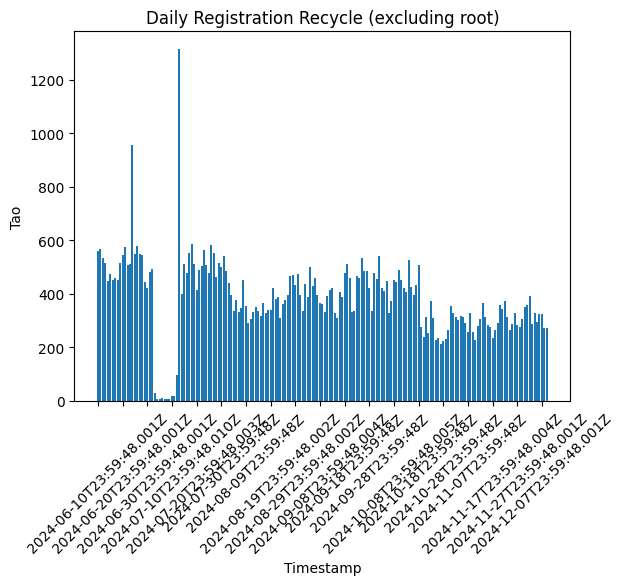

In [107]:
import matplotlib.pyplot as plt
import numpy as np


# create a figure and axis object
fig, ax = plt.subplots()

# plot the bar chart
ax.bar(timestamps, totals)

# set the x-axis ticks to display every 10th timestamp
ax.xaxis.set_ticks(timestamps[::10])

# rotate the x-axis labels for better readability
ax.tick_params(axis='x', labelrotation=45)

# set the title and labels
ax.set_title('Daily Registration Recycle (excluding root)')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Tao')

# show the plot
plt.show()

In [108]:
import numpy as np

# assume Totals is a numpy array
totals = np.array(totals)  # your data here

# calculate statistics
max_total = np.max(totals)
min_total = np.min(totals)
avg_total = np.mean(totals)
std_total = np.std(totals)

# print the results
print(f'Maximum: {max_total:.2f}')
print(f'Minimum: {min_total:.2f}')
print(f'Average: {avg_total:.2f}')
print(f'Standard Deviation: {std_total:.2f}')

Maximum: 1314.79
Minimum: 7.97
Average: 384.18
Standard Deviation: 149.05


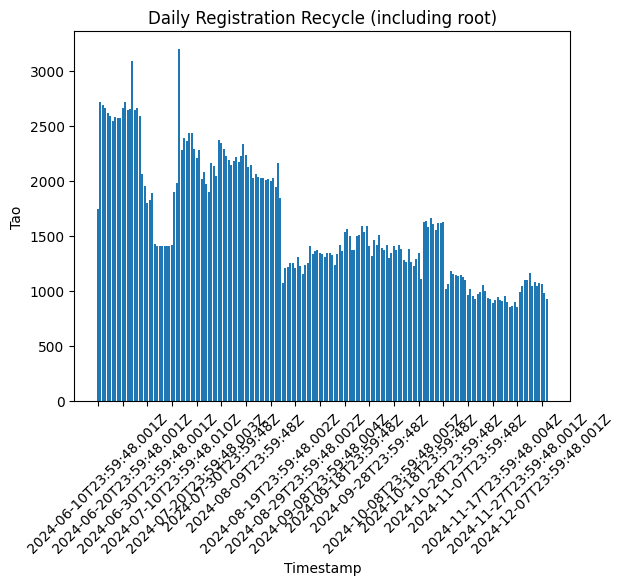

In [109]:
import matplotlib.pyplot as plt
import numpy as np


# create a figure and axis object
fig, ax = plt.subplots()

# plot the bar chart
ax.bar(timestamps, totals_withroot)

# set the x-axis ticks to display every 10th timestamp
ax.xaxis.set_ticks(timestamps[::10])

# rotate the x-axis labels for better readability
ax.tick_params(axis='x', labelrotation=45)

# set the title and labels
ax.set_title('Daily Registration Recycle (including root)')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Tao')

# show the plot
plt.show()

In [110]:
import numpy as np

# assume Totals is a numpy array
totals = np.array(totals_withroot)  # your data here

# calculate statistics
max_total = np.max(totals)
min_total = np.min(totals)
avg_total = np.mean(totals)
std_total = np.std(totals)

# print the results
print(f'Maximum: {max_total:.2f}')
print(f'Minimum: {min_total:.2f}')
print(f'Average: {avg_total:.2f}')
print(f'Standard Deviation: {std_total:.2f}')

Maximum: 3200.24
Minimum: 852.08
Average: 1623.88
Standard Deviation: 552.27
